# Feature selection and Dimensionality reduction

The goal of this investigation is to obtain the best predictions and to select the smallest possible
subset of relevant input variables (features).

The dataset is already divided into train and validation sets (both in 2 forms - unbalanced and balanced). It was done for both **teenagers** and **amItheAsshole** subreddits.

On train and validation sets, there will be used the same dimensionality reduction technique at the same moment (to make the rsults fair) -- the **accuracy** metric value will be calculated on validation data set.

In [1]:
# importing packages

from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_fscore_support

In [2]:
import sklearn
import pandas as pd, numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def replaceThisInsaneNa(x):
    if pd.isna(x):
        return " "
    else:
        return x
    

def datasetToTfIdfPredictorsAndLabels(df, vectorizer1, vectorizer2):
    
    text_bgw = pd.DataFrame(vectorizer1.fit_transform(df.text).toarray(), dtype = 'float32').reset_index(drop=True)
    text_bgw.columns = vectorizer1.get_feature_names()
    new_columns = []

    for column in text_bgw.columns:
        new_columns.append("text_" + column)

    text_bgw.columns = new_columns   
    
    title_bgw = pd.DataFrame(vectorizer2.fit_transform(df.title).toarray(), dtype = 'float32').reset_index(drop=True)
    title_bgw.columns = vectorizer2.get_feature_names()
    
    new_columns = []

    for column in title_bgw.columns:
        new_columns.append("title_" + column)

    title_bgw.columns = new_columns
    
    X = pd.concat([df[["title_wc", "selftext_wc", "title_cc", "selftext_cc"]].reset_index(drop=True), text_bgw, title_bgw], axis=1, join="inner")
    
    return X, df[["flair"]]

def datasetToTfIdfPredictorsAndLabelsForTest(df, vectorizer1, vectorizer2):
    
    text_bgw = pd.DataFrame(vectorizer1.transform(df.text).toarray(), dtype = 'float32').reset_index(drop=True)
    text_bgw.columns = vectorizer1.get_feature_names()
    new_columns = []

    for column in text_bgw.columns:
        new_columns.append("text_" + column)

    text_bgw.columns = new_columns   
    
    title_bgw = pd.DataFrame(vectorizer2.transform(df.title).toarray(), dtype = 'float32').reset_index(drop=True)
    title_bgw.columns = vectorizer2.get_feature_names()
    
    new_columns = []

    for column in title_bgw.columns:
        new_columns.append("title_" + column)

    title_bgw.columns = new_columns
    
    X = pd.concat([df[["title_wc", "selftext_wc", "title_cc", "selftext_cc"]].reset_index(drop=True), text_bgw, title_bgw], axis=1, join="inner")
    
    return X, df[["flair"]]



In [4]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model = LinearSVC()
model2 = RandomForestClassifier()
model3 = GaussianNB()


In [12]:
%pwd

'C:\\Users\\wronap\\Desktop\\NLP-stuff'

In [6]:
# importing train and validation TEENAGERS datasets:

# X_train = pd.read_csv("../data/aita_train.csv", index_col=0, dtype = {'flair': str, 'title': str, 'text': str})
X_trainb = pd.read_csv("../data/aita_train_balanced.csv", index_col=0, dtype = {'flair': str, 'title': str, 'text': str})
# X_test = pd.read_csv("../data/aita_test.csv", index_col=0, dtype = {'flair': str, 'title': str, 'text': str})
X_testb = pd.read_csv("../data/aita_test_balanced.csv", index_col=0, dtype = {'flair': str, 'title': str, 'text': str})
# chosing columns

# X_train = X_train[["flair", "title", "text", "title_wc", "selftext_wc", "title_cc", "selftext_cc"]]
X_trainb = X_trainb[["flair", "title", "text", "title_wc", "selftext_wc", "title_cc", "selftext_cc"]]
# X_test = X_test[["flair", "title", "text", "title_wc", "selftext_wc", "title_cc", "selftext_cc"]]
X_testb = X_testb[["flair", "title", "text", "title_wc", "selftext_wc", "title_cc", "selftext_cc"]]

# X_train.text = X_train.text.apply(replaceThisInsaneNa)
X_trainb.text = X_trainb.text.apply(replaceThisInsaneNa)

# X_test.text = X_test.text.apply(replaceThisInsaneNa)
X_testb.text = X_testb.text.apply(replaceThisInsaneNa)

# X__train = X_train
X__trainb = X_trainb
# X__test = X_test
X__testb = X_testb



In [7]:


# print(X__train.shape)
print(X__trainb.shape)
# print(X__test.shape)
print(X__testb.shape)

(16000, 7)
(1600, 7)


In [8]:
df = pd.DataFrame(columns=['method', 'model', 'n_components', 'n_neighbors', 'accuracy', 'train', 'test', 'precision', 'recall', 'f1'])

In [9]:
import pickle

# AITA fitting without Dimensionality reduction


In [11]:
#X_trainb, y_trainb = datasetToTfIdfPredictorsAndLabels(X__train, vectorizer1, vectorizer2)
#X_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest(X__test, vectorizer1, vectorizer2)

#vectorizer1 = TfidfVectorizer(stop_words = 'english', max_features=500)
#vectorizer2 = TfidfVectorizer(stop_words = 'english', max_features=500)

method_name = "TfIdf-max_features"

for i in range(5,100, 20):
    

    print("@@@@@@@@@@@@ max features of TfIdf: ", i)
    
        
    vectorizer1 = TfidfVectorizer(stop_words = 'english', max_features=i)
    vectorizer2 = TfidfVectorizer(stop_words = 'english', max_features=i)


    X_pcab, y_trainb = datasetToTfIdfPredictorsAndLabels(X__trainb, vectorizer1, vectorizer2)
    X_pca_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest(X__testb, vectorizer1, vectorizer2)

    print("fitting SVM - balanced")
    t0 = time()
    # trained on balanced dataset
    model.fit(X_pcab, y_trainb)
    acc = model.score(X_pca_testb, y_testb)
    y_pred = model.predict(X_pca_testb)
    prf = precision_recall_fscore_support(y_testb, y_pred, average = 'weighted')
    df = df.append({'method': method_name, 'model':'SVM', 'n_components': i, 'n_neighbors': -1, 'accuracy': acc, 'train': 'unbalanced', 'test': 'unbalanced', 'precision': prf[0], 'recall': prf[1], 'f1': prf[2]}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time: ', t1 - t0))

    print("fitting RF - balanced")
    t0 = time()
    # trained on balanced dataset
    model2.fit(X_pcab, y_trainb)
    acc = model2.score(X_pca_testb, y_testb)
    y_pred = model2.predict(X_pca_testb)
    prf = precision_recall_fscore_support(y_testb, y_pred, average = 'weighted')
    df = df.append({'method': method_name, 'model':'RF', 'n_components': i, 'n_neighbors': -1, 'accuracy': acc, 'train': 'unbalanced', 'test': 'unbalanced', 'precision': prf[0], 'recall': prf[1], 'f1': prf[2]}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time: ', t1 - t0))

    print("fitting NB - balanced")
    t0 = time()
    # trained on balanced dataset
    model3.fit(X_pcab, y_trainb)
    acc = model3.score(X_pca_testb, y_testb)
    y_pred = model3.predict(X_pca_testb)
    prf = precision_recall_fscore_support(y_testb, y_pred, average = 'weighted')
    df = df.append({'method': method_name, 'model':'NB', 'n_components': i, 'n_neighbors': -1, 'accuracy': acc, 'train': 'unbalanced', 'test': 'unbalanced', 'precision': prf[0], 'recall': prf[1], 'f1': prf[2]}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time: ', t1 - t0))
    
        # save the model to disk
    filename = 'svm_model_'+ str(i) +'.sav'
    pickle.dump(model, open(filename, 'wb'))
    
    # save the model to disk
    filename = 'rf_model_'+ str(i) +'.sav'
    pickle.dump(model2, open(filename, 'wb'))
    
    # save the model to disk
    filename = 'nb_model_'+ str(i) +'.sav'
    pickle.dump(model3, open(filename, 'wb'))


df.to_csv("AITA-TfIdf-balanced-1.csv")

@@@@@@@@@@@@ max features of TfIdf:  5
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/236027580.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

Time: : 15 sec
fitting RF - balanced
Time: : 3.6 sec
fitting NB - balanced
Time: : 0.045 sec


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


@@@@@@@@@@@@ max features of TfIdf:  25
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/236027580.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

Time: : 22 sec
fitting RF - balanced
Time: : 5 sec
fitting NB - balanced
Time: : 0.058 sec


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


@@@@@@@@@@@@ max features of TfIdf:  45
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/236027580.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_pcab, y_trainb)


Time: : 22 sec
fitting RF - balanced
Time: : 6 sec
fitting NB - balanced
Time: : 0.11 sec


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


@@@@@@@@@@@@ max features of TfIdf:  65
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/236027580.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

Time: : 27 sec
fitting RF - balanced
Time: : 7.5 sec
fitting NB - balanced
Time: : 0.13 sec


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


@@@@@@@@@@@@ max features of TfIdf:  85
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/236027580.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

Time: : 24 sec
fitting RF - balanced
Time: : 9 sec
fitting NB - balanced
Time: : 0.19 sec


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [12]:
method_name = "TfIdf-max_features"

for i in range(100,800, 200):
    

    print("@@@@@@@@@@@@ max features of TfIdf: ", i)
    
        
    vectorizer1 = TfidfVectorizer(stop_words = 'english', max_features=i)
    vectorizer2 = TfidfVectorizer(stop_words = 'english', max_features=i)


    X_pcab, y_trainb = datasetToTfIdfPredictorsAndLabels(X__trainb, vectorizer1, vectorizer2)
    X_pca_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest(X__testb, vectorizer1, vectorizer2)

    print("fitting SVM - balanced")
    t0 = time()
    # trained on balanced dataset
    model.fit(X_pcab, y_trainb)
    acc = model.score(X_pca_testb, y_testb)
    y_pred = model.predict(X_pca_testb)
    prf = precision_recall_fscore_support(y_testb, y_pred, average = 'weighted')
    df = df.append({'method': method_name, 'model':'SVM', 'n_components': i, 'n_neighbors': -1, 'accuracy': acc, 'train': 'unbalanced', 'test': 'unbalanced', 'precision': prf[0], 'recall': prf[1], 'f1': prf[2]}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time: ', t1 - t0))

    print("fitting RF - balanced")
    t0 = time()
    # trained on balanced dataset
    model2.fit(X_pcab, y_trainb)
    acc = model2.score(X_pca_testb, y_testb)
    y_pred = model2.predict(X_pca_testb)
    prf = precision_recall_fscore_support(y_testb, y_pred, average = 'weighted')
    df = df.append({'method': method_name, 'model':'RF', 'n_components': i, 'n_neighbors': -1, 'accuracy': acc, 'train': 'unbalanced', 'test': 'unbalanced', 'precision': prf[0], 'recall': prf[1], 'f1': prf[2]}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time: ', t1 - t0))

    print("fitting NB - balanced")
    t0 = time()
    # trained on balanced dataset
    model3.fit(X_pcab, y_trainb)
    acc = model3.score(X_pca_testb, y_testb)
    y_pred = model3.predict(X_pca_testb)
    prf = precision_recall_fscore_support(y_testb, y_pred, average = 'weighted')
    df = df.append({'method': method_name, 'model':'NB', 'n_components': i, 'n_neighbors': -1, 'accuracy': acc, 'train': 'unbalanced', 'test': 'unbalanced', 'precision': prf[0], 'recall': prf[1], 'f1': prf[2]}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time: ', t1 - t0))
    
    # save the model to disk
    filename = 'svm_model_'+ str(i) +'.sav'
    pickle.dump(model, open(filename, 'wb'))
    
    # save the model to disk
    filename = 'rf_model_'+ str(i) +'.sav'
    pickle.dump(model2, open(filename, 'wb'))
    
    # save the model to disk
    filename = 'nb_model_'+ str(i) +'.sav'
    pickle.dump(model3, open(filename, 'wb'))


df.to_csv("AITA-TfIdf-balanced-2.csv")

for i in range(900,1500, 200):
    

    print("@@@@@@@@@@@@ max features of TfIdf: ", i)
    
        
    vectorizer1 = TfidfVectorizer(stop_words = 'english', max_features=i)
    vectorizer2 = TfidfVectorizer(stop_words = 'english', max_features=i)


    X_pcab, y_trainb = datasetToTfIdfPredictorsAndLabels(X__trainb, vectorizer1, vectorizer2)
    X_pca_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest(X__testb, vectorizer1, vectorizer2)

    print("fitting SVM - balanced")
    t0 = time()
    # trained on balanced dataset
    model.fit(X_pcab, y_trainb)
    acc = model.score(X_pca_testb, y_testb)
    y_pred = model.predict(X_pca_testb)
    prf = precision_recall_fscore_support(y_testb, y_pred, average = 'weighted')
    df = df.append({'method': method_name, 'model':'SVM', 'n_components': i, 'n_neighbors': -1, 'accuracy': acc, 'train': 'unbalanced', 'test': 'unbalanced', 'precision': prf[0], 'recall': prf[1], 'f1': prf[2]}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time: ', t1 - t0))

    print("fitting RF - balanced")
    t0 = time()
    # trained on balanced dataset
    model2.fit(X_pcab, y_trainb)
    acc = model2.score(X_pca_testb, y_testb)
    y_pred = model2.predict(X_pca_testb)
    prf = precision_recall_fscore_support(y_testb, y_pred, average = 'weighted')
    df = df.append({'method': method_name, 'model':'RF', 'n_components': i, 'n_neighbors': -1, 'accuracy': acc, 'train': 'unbalanced', 'test': 'unbalanced', 'precision': prf[0], 'recall': prf[1], 'f1': prf[2]}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time: ', t1 - t0))

    print("fitting NB - balanced")
    t0 = time()
    # trained on balanced dataset
    model3.fit(X_pcab, y_trainb)
    acc = model3.score(X_pca_testb, y_testb)
    y_pred = model3.predict(X_pca_testb)
    prf = precision_recall_fscore_support(y_testb, y_pred, average = 'weighted')
    df = df.append({'method': method_name, 'model':'NB', 'n_components': i, 'n_neighbors': -1, 'accuracy': acc, 'train': 'unbalanced', 'test': 'unbalanced', 'precision': prf[0], 'recall': prf[1], 'f1': prf[2]}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time: ', t1 - t0))
    
    # save the model to disk
    filename = 'svm_model_'+ str(i) +'.sav'
    pickle.dump(model, open(filename, 'wb'))
    
    # save the model to disk
    filename = 'rf_model_'+ str(i) +'.sav'
    pickle.dump(model2, open(filename, 'wb'))
    
    # save the model to disk
    filename = 'nb_model_'+ str(i) +'.sav'
    pickle.dump(model3, open(filename, 'wb'))


df.to_csv("AITA-TfIdf-balanced-3.csv")

@@@@@@@@@@@@ max features of TfIdf:  100
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/2649451150.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_pcab, y_trainb)


Time: : 24 sec
fitting RF - balanced
Time: : 8.5 sec
fitting NB - balanced
Time: : 0.18 sec


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


@@@@@@@@@@@@ max features of TfIdf:  300
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/2649451150.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

Time: : 32 sec
fitting RF - balanced
Time: : 14 sec
fitting NB - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Time: : 0.49 sec
@@@@@@@@@@@@ max features of TfIdf:  500
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/2649451150.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_pcab, y_trainb)


Time: : 35 sec
fitting RF - balanced
Time: : 18 sec
fitting NB - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Time: : 0.81 sec
@@@@@@@@@@@@ max features of TfIdf:  700
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/2649451150.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_pcab, y_trainb)


Time: : 37 sec
fitting RF - balanced
Time: : 22 sec
fitting NB - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Time: : 1.1 sec
@@@@@@@@@@@@ max features of TfIdf:  900
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Time: : 39 sec
fitting RF - balanced


C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/2649451150.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_pcab, y_trainb)


Time: : 29 sec
fitting NB - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Time: : 2 sec
@@@@@@@@@@@@ max features of TfIdf:  1100
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Time: : 42 sec
fitting RF - balanced


C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/2649451150.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_pcab, y_trainb)


Time: : 29 sec
fitting NB - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Time: : 2.1 sec
@@@@@@@@@@@@ max features of TfIdf:  1300
fitting SVM - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time: : 43 sec
fitting RF - balanced


C:\Users\Patryk\AppData\Local\Temp/ipykernel_500/2649451150.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_pcab, y_trainb)


Time: : 37 sec
fitting NB - balanced


C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Time: : 3.1 sec


In [13]:
df_wide = df.pivot("n_components", "model", "f1")

Text(1020, 0.085, 'Random model')

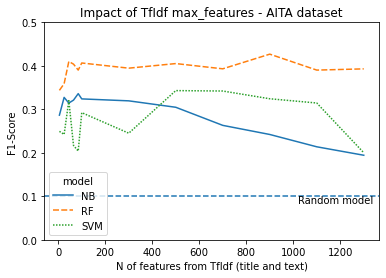

In [15]:

p = sns.lineplot(data=df_wide)
p.set(ylim=(0., 0.5))
p.set_xlabel('N of features from TfIdf (title and text)')
p.set_ylabel('F1-Score')

p.set_title('Impact of TfIdf max_features - AITA dataset')

p.axhline(0.1, ls='--')
p.text(1020, 0.085, "Random model")

In [16]:
df.sort_values("f1", ascending = False)

,method,model,n_components,n_neighbors,accuracy,train,test,precision,recall,f1
28,TfIdf-max_features,RF,900,-1,0.441250,unbalanced,unbalanced,0.456339,0.441250,0.426899
7,TfIdf-max_features,RF,45,-1,0.417500,unbalanced,unbalanced,0.425942,0.417500,0.410048
16,TfIdf-max_features,RF,100,-1,0.415625,unbalanced,unbalanced,0.425435,0.415625,0.406570
22,TfIdf-max_features,RF,500,-1,0.416875,unbalanced,unbalanced,0.430056,0.416875,0.405233
10,TfIdf-max_features,RF,65,-1,0.413750,unbalanced,unbalanced,0.418771,0.413750,0.403912
19,TfIdf-max_features,RF,300,-1,0.408750,unbalanced,unbalanced,0.399497,0.408750,0.394684
25,TfIdf-max_features,RF,700,-1,0.408750,unbalanced,unbalanced,0.404200,0.408750,0.393177
34,TfIdf-max_features,RF,1300,-1,0.408750,unbalanced,unbalanced,0.401464,0.408750,0.393062
13,TfIdf-max_features,RF,85,-1,0.402500,unbalanced,unbalanced,0.392933,0.402500,0.390260
31,TfIdf-max_features,RF,1100,-1,0.403125,unbalanced,unbalanced,0.411985,0.403125,0.390218


# Best models

In [17]:
from sklearn.metrics import f1_score

In [19]:
i = 900

vectorizer1 = TfidfVectorizer(stop_words = 'english', max_features=i)
vectorizer2 = TfidfVectorizer(stop_words = 'english', max_features=i)


X_pcab, y_trainb = datasetToTfIdfPredictorsAndLabels(X__trainb, vectorizer1, vectorizer2)
X_pca_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest(X__testb, vectorizer1, vectorizer2)


loaded_model = pickle.load(open("rf_model_900.sav", 'rb'))


model_pred = loaded_model.predict(X_pca_testb)

rf_proba = loaded_model.predict_proba(X_pca_testb)

rf_f1_scores = f1_score(y_testb, model_pred, average = None, labels=np.unique(y_testb))

print(rf_f1_scores)
print(np.unique(y_testb))

pd.DataFrame(rf_proba).to_csv("rf_proba.csv")
pd.DataFrame(rf_f1_scores).to_csv("rf_f1_scores.csv")


[0.25737265 0.3127572  0.94711538 0.29268293 0.23222749 0.26699029
 0.13043478 0.97560976]
['asshole' 'everyone sucks' 'meta' 'no a-holes here' 'not enough info'
 'not the a-hole' 'tl;dr' 'update']


In [20]:
from sklearn.calibration import CalibratedClassifierCV

i = 500

vectorizer1 = TfidfVectorizer(stop_words = 'english', max_features=i)
vectorizer2 = TfidfVectorizer(stop_words = 'english', max_features=i)


X_pcab, y_trainb = datasetToTfIdfPredictorsAndLabels(X__trainb, vectorizer1, vectorizer2)
X_pca_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest(X__testb, vectorizer1, vectorizer2)


loaded_model = CalibratedClassifierCV(pickle.load(open("svm_model_500.sav", 'rb')))

loaded_model.fit(X_pcab, y_trainb)

model_pred = loaded_model.predict(X_pca_testb)

svm_proba = loaded_model.predict_proba(X_pca_testb)

svm_f1_scores = f1_score(y_testb, model_pred, average = None, labels=np.unique(y_testb))

print(svm_f1_scores)
print(np.unique(y_testb))

pd.DataFrame(svm_proba).to_csv("svm_proba.csv")
pd.DataFrame(svm_f1_scores).to_csv("svm_f1_scores.csv")



C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear f

[0.18617021 0.21052632 0.91375291 0.22929936 0.13924051 0.23668639
 0.11552347 0.98029557]
['asshole' 'everyone sucks' 'meta' 'no a-holes here' 'not enough info'
 'not the a-hole' 'tl;dr' 'update']


In [23]:
i = 85

vectorizer1 = TfidfVectorizer(stop_words = 'english', max_features=i)
vectorizer2 = TfidfVectorizer(stop_words = 'english', max_features=i)


X_pcab, y_trainb = datasetToTfIdfPredictorsAndLabels(X__trainb, vectorizer1, vectorizer2)
X_pca_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest(X__testb, vectorizer1, vectorizer2)


loaded_model = pickle.load(open("nb_model_85.sav", 'rb'))


model_pred = loaded_model.predict(X_pca_testb)

nb_proba = loaded_model.predict_proba(X_pca_testb)

nb_f1_scores = f1_score(y_testb, model_pred, average = None, labels=np.unique(y_testb))

print(nb_f1_scores)
print(np.unique(y_testb))

pd.DataFrame(nb_proba).to_csv("nb_proba.csv")
pd.DataFrame(nb_f1_scores).to_csv("nb_f1_scores.csv")


[0.11450382 0.23888889 0.93627451 0.23209877 0.1048951  0.19941349
 0.29802513 0.56454389]
['asshole' 'everyone sucks' 'meta' 'no a-holes here' 'not enough info'
 'not the a-hole' 'tl;dr' 'update']
